<a href="https://colab.research.google.com/github/choiws777/test/blob/master/CNA6_day4_2_wordcloud_WS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 구글 코랩 사전 준비 
- 설치 후 재시작 필요

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,538 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and d

In [ ]:
! pip install konlpy wordcloud

     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 448 kB 46.2 MB/s 
     |████████████████████████████████| 86 kB 5.7 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
# 한글 폰트 지정
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

# Library

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## 경고문구 안뜨게하는 
import warnings
warnings.filterwarnings(action='ignore')

# 한글 형태소 분석기 KONLPy

###  설치  
https://konlpy-ko.readthedocs.io/ko/v0.4.3/install/#id2  
https://alliswellv2030.tistory.com/2

In [ ]:
from konlpy.tag import Okt

okt = Okt()

In [ ]:
text = "DB인재개발원은 ①DB가치(Value) 공유, ②핵심인재 양성, ③성과창출 지원 HRD를 통해 「DB의 기업가정신을 실천하는 최고인재」를 양성하여 DB의 비전 달성에 기여하고 있습니다."
print(text)

DB인재개발원은 ①DB가치(Value) 공유, ②핵심인재 양성, ③성과창출 지원 HRD를 통해 「DB의 기업가정신을 실천하는 최고인재」를 양성하여 DB의 비전 달성에 기여하고 있습니다.


In [ ]:
okt.pos("오늘은 이상하기 very 졸려")

[('오늘', 'Noun'),
 ('은', 'Josa'),
 ('이상하기', 'Adjective'),
 ('very', 'Alpha'),
 ('졸려', 'Verb')]

In [ ]:
# 단어 + 형태소
print(okt.pos(text))

[('DB', 'Alpha'), ('인재', 'Noun'), ('개발', 'Noun'), ('원', 'Suffix'), ('은', 'Josa'), ('①', 'Foreign'), ('DB', 'Alpha'), ('가치', 'Noun'), ('(', 'Punctuation'), ('Value', 'Alpha'), (')', 'Punctuation'), ('공유', 'Noun'), (',', 'Punctuation'), ('②', 'Foreign'), ('핵심', 'Noun'), ('인재', 'Noun'), ('양성', 'Noun'), (',', 'Punctuation'), ('③', 'Foreign'), ('성과', 'Noun'), ('창', 'Noun'), ('출', 'Verb'), ('지원', 'Noun'), ('HRD', 'Alpha'), ('를', 'Noun'), ('통해', 'Noun'), ('「', 'Foreign'), ('DB', 'Alpha'), ('의', 'Noun'), ('기업가', 'Noun'), ('정신', 'Noun'), ('을', 'Josa'), ('실천', 'Noun'), ('하는', 'Verb'), ('최고', 'Noun'), ('인재', 'Noun'), ('」', 'Foreign'), ('를', 'Noun'), ('양성', 'Noun'), ('하여', 'Verb'), ('DB', 'Alpha'), ('의', 'Noun'), ('비전', 'Verb'), ('달성', 'Noun'), ('에', 'Josa'), ('기여', 'Noun'), ('하고', 'Josa'), ('있습니다', 'Adjective'), ('.', 'Punctuation')]


In [ ]:
# 단어 
print(okt.morphs(text))

['DB', '인재', '개발', '원', '은', '①', 'DB', '가치', '(', 'Value', ')', '공유', ',', '②', '핵심', '인재', '양성', ',', '③', '성과', '창', '출', '지원', 'HRD', '를', '통해', '「', 'DB', '의', '기업가', '정신', '을', '실천', '하는', '최고', '인재', '」', '를', '양성', '하여', 'DB', '의', '비전', '달성', '에', '기여', '하고', '있습니다', '.']


In [ ]:
# 명사 
print(okt.nouns(text))

['인재', '개발', '가치', '공유', '핵심', '인재', '양성', '성과', '창', '지원', '를', '통해', '의', '기업가', '정신', '실천', '최고', '인재', '를', '양성', '의', '달성', '기여']


In [ ]:
##영어 명사만 뽑는건?
tx= okt.pos('she is very good')

In [ ]:
print(okt.nouns(tx))

TypeError: ignored

# 인터넷 문서를 가져와서 워드클라우드 만들기

In [ ]:
##영어는 영어 워드클라우드 검색해서 쓰삼   영어word cloud

In [ ]:
from collections import Counter
from wordcloud import WordCloud

In [ ]:
sentence = """ A 12Mpixel 1.3” optical format CMOS HDR image sensor achieving single-exposure flicker-free 90dB Dynamic range in GS shutter mode and 110dB Dynamic Range in 2-exposure ERS mode
Parthasarathy Sampath+, Genis Chapinal*, Gurvinder Singh, Miten Odharia, Manuel Innocent, Tomas Geurts, Anirudh Oberoi, Rick Mauritzson, Chris Parks, John McCarten, Cristian Tivarus, Hung Doan, Neeraj Chouhan, Shreesha Gopalakrishna, Dan Pates, Igor Butinar, Rajashekar Benjaram  """

In [ ]:
len(sentence)

458

In [ ]:
total_words = okt.nouns(sentence)
len(total_words)

0

In [ ]:
total_words[:5]

[]

In [ ]:
total_words[10:20]

[]

In [ ]:
final_words = []
for word in total_words[:5]:
    if len(word) > 2 :
        print(word)
        final_words.append(word)

In [ ]:
final_words

[]

In [ ]:
# 한 글자 단어는 제거
final_words = [ word for word in total_words if len(word) > 1 ]
print(len(final_words))
print(final_words[:10])

0
[]


In [ ]:
# 단어 숫자 세기 
count = Counter(final_words)
tags = count.most_common(50)
print(tags)

[]


In [ ]:
dict(tags)

{}

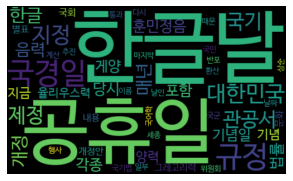

In [ ]:
# 워드 클라우드 그리기
wordcloud = WordCloud(font_path='NanumBarunGothic', 
                      background_color='black', 
                      width=500, 
                      height=300).generate_from_frequencies(dict(tags))

fig = plt.figure(figsize=(5, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

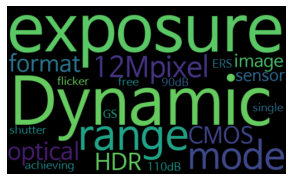

In [ ]:
# 워드 클라우드 그리기
wordcloud = WordCloud(font_path='NanumBarunGothic', 
                      background_color='black', 
                      width=500, 
                      height=300).generate('A 12Mpixel 1.3” optical format CMOS HDR image sensor achieving single-exposure flicker-free 90dB Dynamic range in GS shutter mode and 110dB Dynamic Range in 2-exposure ERS mode')

fig = plt.figure(figsize=(5, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 이미지 마스킹
from PIL import Image

image_path = '/content/world-map-g6929ea30a_1280.png'

icon=Image.open(image_path)
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon, icon)
mask = np.array(mask)

In [ ]:
mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

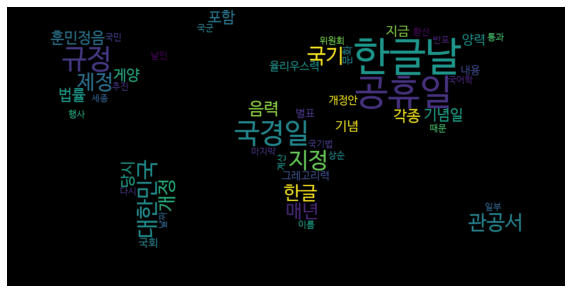

In [ ]:
# 워드 클라우드 그리기
wordcloud = WordCloud(font_path='NanumBarunGothic', 
                      background_color='black', 
                      width=800, 
                      height=800, 
                      mask=mask).generate_from_frequencies(dict(tags))

fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
## https://pixabay.com/ko/
무료 이미지 다운

In [ ]:
##https://www.lucypark.kr/courses/2015-dm/text-mining.html